In [1]:
import numpy as np

results_nlpd_pogpe_train = np.empty((2,10))  # results of mcmc and map (svi)
results_nlpd_single_gp_train = np.empty((1,10))

results_nlpd_pogpe_test = np.empty((2,10))  # results of mcmc and map (svi)
results_nlpd_single_gp_test = np.empty((1,10))

results_mse_pogpe_train = np.empty((2,10))
results_mse_single_gp_train = np.empty((1,10))

results_mse_pogpe_train = np.empty((2,10))
results_mse_single_gp_train = np.empty((1,10))

results_mse_pogpe_test = np.empty((2,10))
results_mse_single_gp_test = np.empty((1,10))

results_nlpd_mogpe_train = np.empty((2,10))  # results of mcmc and map (svi)
results_nlpd_mogpe_test = np.empty((2,10))  # results of mcmc and map (svi)

results_mse_mogpe_train = np.empty((2,10))  # results of mcmc and map (svi)
results_mse_mogpe_test = np.empty((2,10))  # results of mcmc and map (svi)


for i_seed in range(10):

    aux1 = np.load(f'results_po_and_mo_pendulum_M_2_S_150_i_{i_seed}.npz')
    aux2 = np.load(f'results_single_gp_pendulum_i_{i_seed}.npz')
    
    results_nlpd_pogpe_train[0,i_seed] = -aux1['lpd_pogpe_mcmc_train']   # first row is for mcmc results
    results_nlpd_pogpe_test[0,i_seed] = -aux1['lpd_pogpe_mcmc_test']

    results_nlpd_pogpe_train[1,i_seed] = -aux1['lpd_pogpe_svi_train']   # second row is for map (svi) results
    results_nlpd_pogpe_test[1,i_seed] = -aux1['lpd_pogpe_svi_test']

    results_mse_pogpe_train[0,i_seed] = aux1['mse_pogpe_mcmc_train']  # first row is for mcmc results
    results_mse_pogpe_test[0,i_seed] = aux1['mse_pogpe_mcmc_test']

    results_mse_pogpe_train[1,i_seed] = aux1['mse_pogpe_svi_train']  # second row is for map (svi) results
    results_mse_pogpe_test[1,i_seed] = aux1['mse_pogpe_svi_test']

    results_nlpd_mogpe_train[0,i_seed] = -aux1['lpd_mogpe_mcmc_train']   # first row is for mcmc results
    results_nlpd_mogpe_test[0,i_seed] = -aux1['lpd_mogpe_mcmc_test']

    results_nlpd_mogpe_train[1,i_seed] = -aux1['lpd_mogpe_svi_train']   # second row is for map (svi) results
    results_nlpd_mogpe_test[1,i_seed] = -aux1['lpd_mogpe_svi_test']

    results_mse_mogpe_train[0,i_seed] = aux1['mse_mogpe_mcmc_train']  # first row is for mcmc results
    results_mse_mogpe_test[0,i_seed] = aux1['mse_mogpe_mcmc_test']

    results_mse_mogpe_train[1,i_seed] = aux1['mse_mogpe_svi_train']  # second row is for map (svi) results
    results_mse_mogpe_test[1,i_seed] = aux1['mse_mogpe_svi_test']

    results_nlpd_single_gp_train[0,i_seed] = -aux2['single_gp_train_lpd']
    results_nlpd_single_gp_test[0,i_seed] = -aux2['single_gp_test_lpd']

    results_mse_single_gp_train[0,i_seed] = aux2['single_gp_train_mse']
    results_mse_single_gp_test[0,i_seed] = aux2['single_gp_test_mse']


In [2]:
print(results_nlpd_single_gp_train.mean(), results_nlpd_single_gp_test.mean())
print(results_mse_single_gp_train.mean(), results_mse_single_gp_test.mean())

-2.9134631663129644 -1.0095045414907569
2.144685623737997e-05 0.12722199669599302


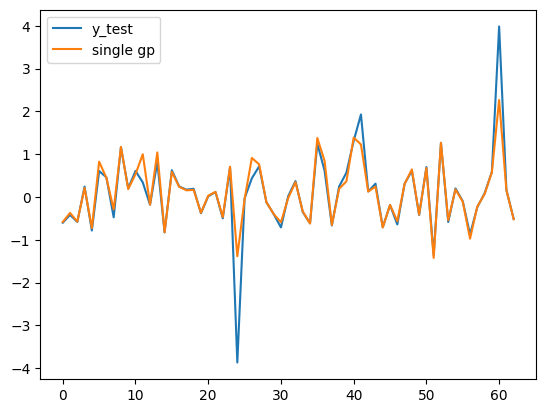

In [3]:
import matplotlib.pyplot as plt
aux2 = np.load(f'results_single_gp_pendulum_i_8.npz')
y_test = aux2["y_test"]
y_pred_gp = aux2["ymu_single_gp"]
plt.plot(range(len(y_test)), y_test, label ="y_test")
plt.plot(range(len(y_test)), y_pred_gp, label ="single gp")
plt.legend();

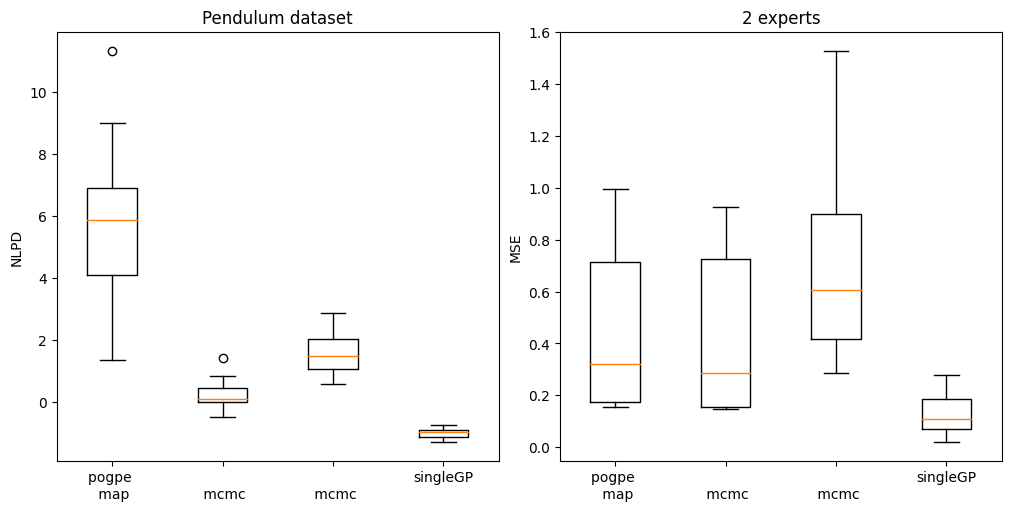

In [5]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

# error = "lpd"
# data_subset = "test"

 
data_1 = results_nlpd_pogpe_test[1,:].squeeze()  # svi/map
data_2 = results_nlpd_pogpe_test[0,:].squeeze()  # mcmc

data_3 = results_nlpd_mogpe_test[1,:].squeeze()
data_4 = results_nlpd_mogpe_test[0,:].squeeze()

data_5 = results_nlpd_single_gp_test.squeeze()

# data = [data_1, data_2, data_3, data_4, data_5]
data = [data_1, data_2, data_4, data_5]
 
fig,ax = plt.subplots(nrows=1, ncols=2,figsize=(10, 5), constrained_layout=True)
 

# Creating plot
bp = ax[0].boxplot(data)

# ax[0].set_xticks([1,2,3,4,5])
ax[0].set_xticks([1,2,3,4])

ax[0].set_xticklabels(["pogpe \n map",
                    " \n mcmc",
                    # 'mogpe \n map',
                    ' \n mcmc',
                    'singleGP'
                    ]
                    )
ax[0].set_ylabel('NLPD')
ax[0].set_title("Pendulum dataset")


 
data_1 = results_mse_pogpe_test[1,:].squeeze()  # svi/map
data_2 = results_mse_pogpe_test[0,:].squeeze()  # mcmc

# data_3 = results_mse_mogpe_test[1,:].squeeze()
data_4 = results_mse_mogpe_test[0,:].squeeze()

data_5 = results_mse_single_gp_test.squeeze()

# data = [data_1, data_2, data_3, data_4, data_5]

data = [data_1, data_2, data_4, data_5]
 

 

bp = ax[1].boxplot(data)

# ax[1].set_xticks([1,2,3,4,5])
ax[1].set_xticks([1,2,3,4])
ax[1].set_xticklabels(
                    ["pogpe \n map",
                    " \n mcmc",
                    # 'mogpe \n map',
                    ' \n mcmc',
                    'singleGP'
                    ]
                    )
ax[1].set_ylabel('MSE')
ax[1].set_title("2 experts");
 
# # show plot
# plt.show()
